In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
train = pd.read_csv('titanic_train.csv')

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Missing Data

In [70]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

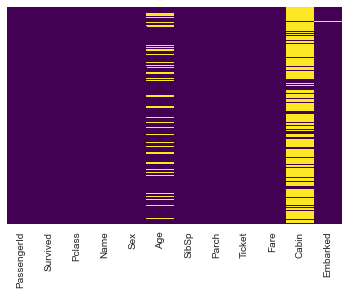

In [71]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

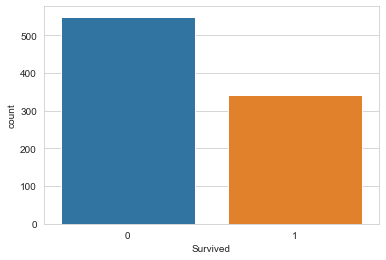

In [72]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

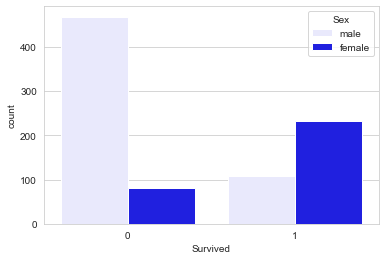

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,color='b')

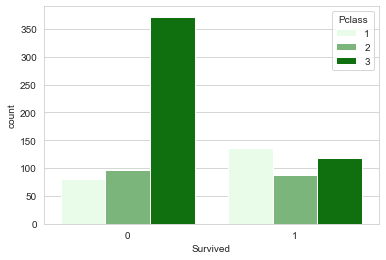

In [74]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,color='g')

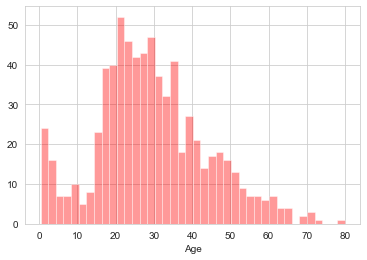

In [75]:
sns.distplot(train['Age'].dropna(),kde=False,color='r',bins=40)

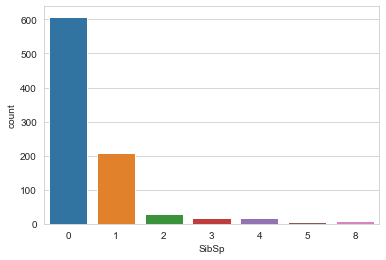

In [76]:
sns.countplot(x='SibSp',data=train)

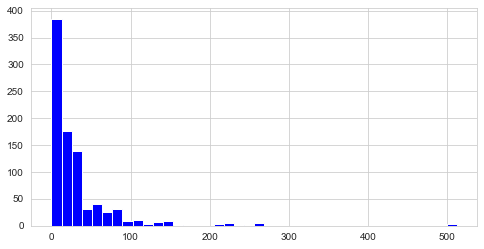

In [77]:
train['Fare'].hist(color='b',bins=40,figsize=(8,4))

#Data Cleaning

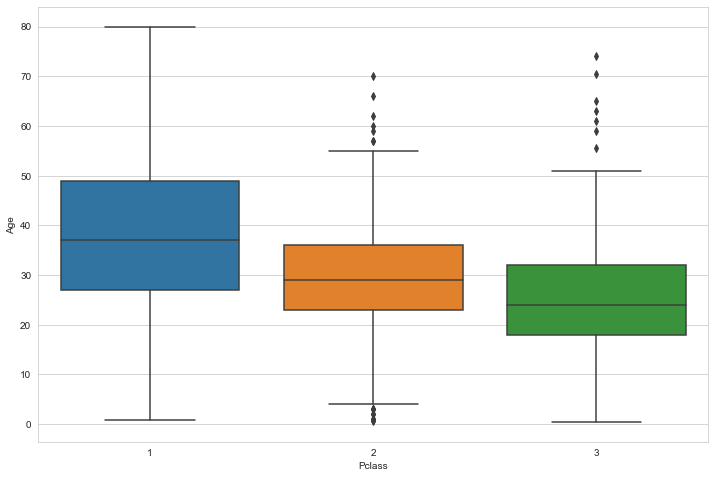

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=train)

In [79]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else: 
        return Age


In [80]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis =1)

In [81]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

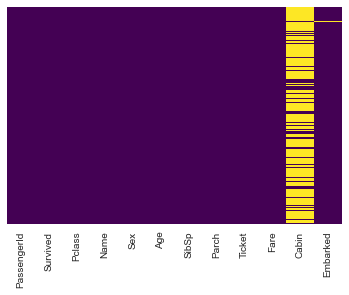

In [82]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [83]:
train.drop('Cabin',axis = 1,inplace=True)

In [86]:
train.drop('Embarked',axis = 1,inplace=True)

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


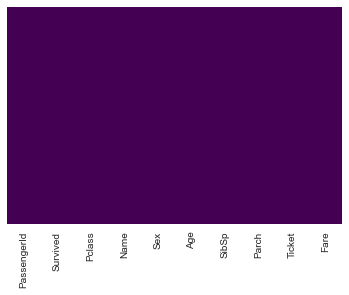

In [88]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')